In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("E:/Downloads/Email Spam Collection Dataset.zip",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Renaming the columns
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [7]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df["text"] =df["text"].fillna("").astype(str)

In [9]:
# Converting target feature to 0 and 1

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.isnull().sum()            # Checking the missing values

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()       # Checking for duplicate values

np.int64(403)

In [14]:
df = df.drop_duplicates(keep="first")      # removing duplicate values

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
df.shape

(5169, 2)

# EDA

In [18]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

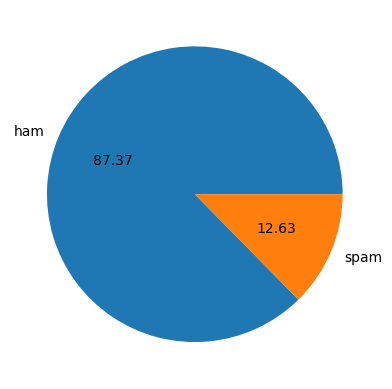

In [19]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")    # Pie Chart
plt.show()

In [20]:
import nltk

In [21]:
# Total number of characters in the Row

df["num_characters"] = df["text"].apply(len)

C:\Users\User\AppData\Local\Temp\ipykernel_3672\640123851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df["text"].apply(len)


In [22]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
# Total number of words in the Row

df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_3672\4097911405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))


In [24]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [25]:
df["num_sent"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\User\AppData\Local\Temp\ipykernel_3672\3793611016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sent"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))


In [26]:
df

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[["num_characters","num_words","num_sent"]].describe()          # Statastical Summary of data

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

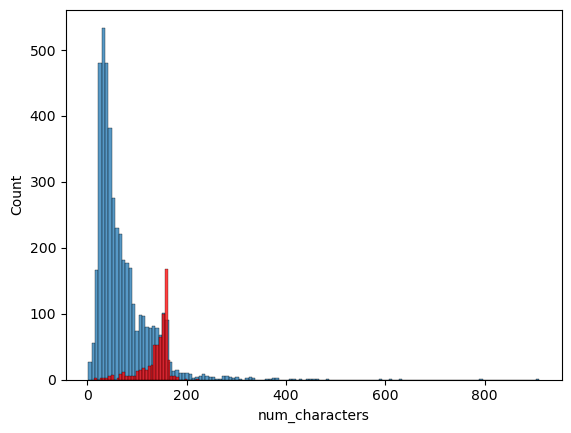

<Figure size 1200x600 with 0 Axes>

In [29]:
sns.histplot(df[df["target"] == 0]["num_characters"])                      # 0 - Ham(Not Spam)
sns.histplot(df[df["target"] == 1]["num_characters"],color="red")          # 1 - Spam
plt.figure(figsize=(12,6))        # (width,height)

<Figure size 1200x600 with 0 Axes>

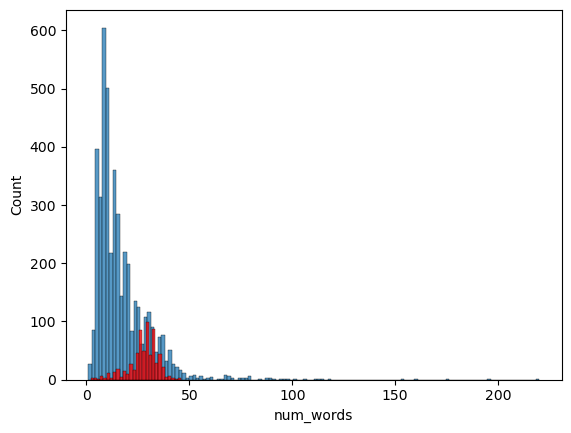

<Figure size 1200x600 with 0 Axes>

In [30]:
sns.histplot(df[df["target"] == 0]["num_words"])                      # 0 - Ham(Not Spam)
sns.histplot(df[df["target"] == 1]["num_words"],color="red")          # 1 - Spam
plt.figure(figsize=(12,6))        # (width,height)

# Text Processing
### 1.Lower Case
### 2.Tokenization
### 3.Removing special characters
### 4.Removing stopwords and punctuation
### 5.Stemming

In [31]:
# Stemming - dancing:danc , loving:love , running,runner:run

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [32]:
from nltk.corpus import stopwords
import string

In [33]:
def transform_text(text):
    text = text.lower()                      # Converting all characters to lowercase
    text = nltk.word_tokenize(text)          # Tokenizing all the characters

    y=[]
    for i in text:
        if i.isalnum():                     # removing  special characters
            y.append(i)

    text=y[:]                               # Cloning[shallow copy]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
df["transformed_text"] = df["text"].apply(transform_text)

C:\Users\User\AppData\Local\Temp\ipykernel_3672\1397677677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df["text"].apply(transform_text)


In [35]:
df

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [36]:
from wordcloud import WordCloud

In [37]:
wc = WordCloud(width=550,height=550,min_font_size=10,background_color="white")

In [38]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

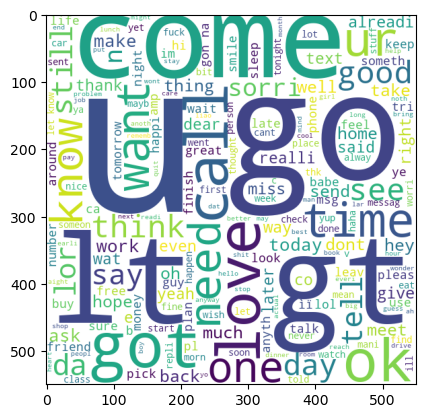

In [39]:
plt.imshow(ham_wc)

In [40]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

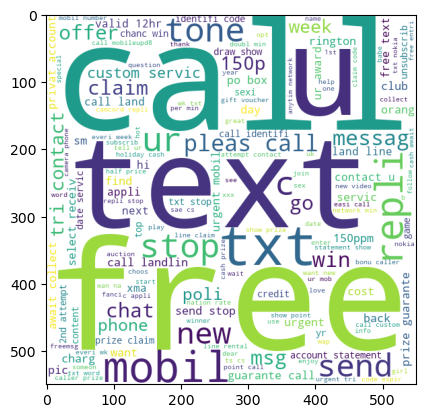

In [41]:
plt.imshow(spam_wc)

In [42]:
spam_corpus = []

for msg in df[df["target"] == 1]["transformed_text"].tolist():         # Spam
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
import seaborn as sns

In [45]:
from collections import Counter          # It will create a dictionary informing how many times the word has been repeated
temp_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

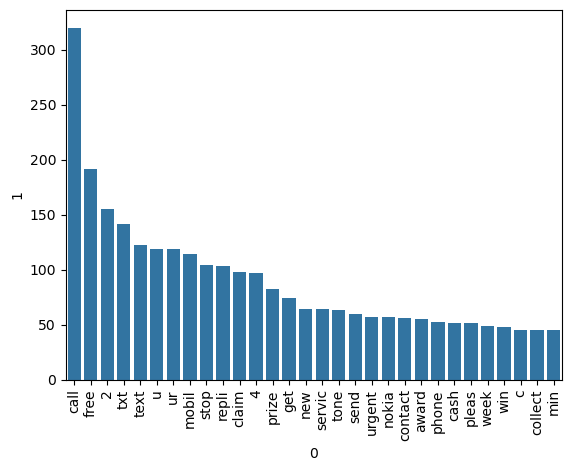

In [46]:
sns.barplot(x=temp_df[0],y=temp_df[1])
plt.xticks(rotation="vertical")
plt.show()

In [47]:
ham_corpus = []

for msg in df[df["target"] == 0]["transformed_text"].tolist():         # Ham
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

35404

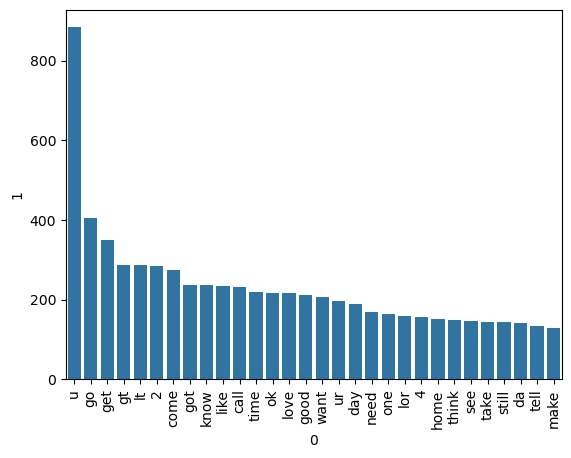

In [49]:
from collections import Counter          # It will create a dictionary informing how many times the word has been repeated
temp_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=temp_df[0],y=temp_df[1])
plt.xticks(rotation="vertical")
plt.show()

# Model Building

## Text Vectorization using CountVectorizer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()            # bag of words

In [51]:
X = cv.fit_transform(df["transformed_text"]).toarray()

In [52]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
X.shape

(5169, 6708)

In [54]:
y = df["target"].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# GaussianNB

In [60]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.8800773694390716

In [62]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[792, 104],
       [ 20, 118]])

In [63]:
precision = precision_score(y_test,y_pred1)
precision

0.5315315315315315

# MultinomialNB

In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.9642166344294004

In [66]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[871,  25],
       [ 12, 126]])

In [67]:
precision = precision_score(y_test,y_pred2)
precision

0.8344370860927153

# BernoulliNB

In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred3)
accuracy

0.9700193423597679

In [70]:
cm = confusion_matrix(y_test,y_pred3)
cm

array([[893,   3],
       [ 28, 110]])

In [71]:
precision = precision_score(y_test,y_pred3)
precision

0.9734513274336283

## Text Vectorization using TfidVectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)            # Transforms text to feature vectors

In [73]:
X = tf.fit_transform(df["transformed_text"]).toarray()

In [74]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
X.shape

(5169, 3000)

In [76]:
y = df["target"].values

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [80]:
gnb1.fit(X_train,y_train)
y_pred1 = gnb1.predict(X_test)

accuracy = accuracy_score(y_test,y_pred1)
print(accuracy)

cm = confusion_matrix(y_test,y_pred1)
print(cm)

precision = precision_score(y_test,y_pred1)
print(precision)

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [81]:
mnb1.fit(X_train,y_train)
y_pred2 = mnb1.predict(X_test)

accuracy = accuracy_score(y_test,y_pred2)
print(accuracy)

cm = confusion_matrix(y_test,y_pred2)
print(cm)

precision = precision_score(y_test,y_pred2)
print(precision)

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [82]:
bnb1.fit(X_train,y_train)
y_pred3 = bnb1.predict(X_test)

accuracy = accuracy_score(y_test,y_pred3)
print(accuracy)

cm = confusion_matrix(y_test,y_pred3)
print(cm)

precision = precision_score(y_test,y_pred3)
print(precision)

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Finally , We have choosen TFID Vectorizer --> MultinomialNB

In [83]:
import pickle

In [84]:
pickle.dump(tf,open("vectorizer.pkl","wb"))
pickle.dump(mnb1,open("model.pkl","wb"))